In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

In [5]:
data = pd.read_csv("FINAL_USO.csv")

In [6]:
data.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [7]:
data.head().style.background_gradient(cmap='Reds')

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.290040,11967.839840,11825.219730,11868.809570,11868.809570,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.301800,1.298200,1.305100,1.295700,1,105.090000,104.880000,106.500000,104.880000,14330,1,93.420000,94.910000,96.000000,93.330000,0,53604,54248,54248,52316,119440,1,1.911000,1.911000,1.911000,1.911000,1,1414.650000,1420.300000,1423.350000,1376.850000,0,618.850000,614.700000,615.000000,614.600000,1,1425,80.341000,80.565000,80.630000,80.130000,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.250000,11968.179690,11819.309570,11866.389650,11866.389650,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.303500,1.302000,1.308700,1.299700,1,103.350000,103.510000,104.560000,102.460000,140080,0,93.790000,93.430000,94.800000,92.530000,1,53458,53650,54030,52890,65390,0,1.851000,1.851000,1.851000,1.851000,0,1420.250000,1414.750000,1431.750000,1400.700000,1,623.650000,622.600000,623.450000,622.300000,1,1400,80.249000,80.175000,80.395000,79.935000,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.540040,11925.879880,11735.190430,11766.259770,11766.259770,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.299500,1.304300,1.304400,1.298100,0,103.640000,103.630000,104.570000,102.370000,147880,1,94.090000,93.770000,94.430000,92.550000,1,52961,53400,53400,52544,67280,0,1.810000,1.810000,1.810000,1.810000,0,1411.100000,1422.650000,1427.600000,1404.600000,0,608.800000,626.000000,630.000000,608.600000,0,1400,80.207000,80.300000,80.470000,80.125000,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.209960,12117.129880,11768.830080,12103.580080,12103.580080,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.307900,1.300300,1.313300,1.299400,1,106.730000,104.300000,107.270000,103.910000,170240,1,95.550000,96.390000,99.700000,96.390000,1,53487,52795,53575,52595,55130,1,1.927000,1.927000,1.927000,1.927000,1,1434.750000,1408.950000,1436.550000,1408.150000,1,626.650000,622.450000,622.450000,622.450000,1,1400,80.273000,80.890000,80.940000,80.035000,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.580080,12119.700200,11999.440430,12107.740230,12107.740230,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.304500,1.307900,1.319700,1.30240

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [10]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().any()

Date             False
Open             False
High             False
Low              False
Close            False
                 ...  
USO_High         False
USO_Low          False
USO_Close        False
USO_Adj Close    False
USO_Volume       False
Length: 81, dtype: bool

In [12]:
data.isnull().sum()


Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1713    False
1714    False
1715    False
1716    False
1717    False
Length: 1718, dtype: bool

In [14]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [15]:
# caladd_suffixculate correleation
correleation = data.corr()
correleation

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,...,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,...,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,...,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,...,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Adj Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,...,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USO_High,0.634864,0.637208,0.633623,0.635311,0.635311,0.083064,-0.774626,-0.775482,-0.773550,-0.774799,...,0.614587,0.614766,0.600523,-0.522581,0.999857,1.000000,0.999818,0.999867,0.999867,-0.695678
USO_Low,0.634277,0.636538,0.633140,0.634732,0.634732,0.080475,-0.771235,-0.772154,-0.770087,-0.771396,...,0.613844,0.613931,0.599819,-0.523956,0.999848,0.999818,1.000000,0.999879,0.999879,-0.702665
USO_Close,0.635138,0.637483,0.633994,0.635675,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221
USO_Adj Close,0.635138,0.637483,0.633994,0.635675,0.635675,0.081642,-0.773099,-0.773957,-0.771928,-0.773159,...,0.614733,0.614915,0.600756,-0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,-0.699221


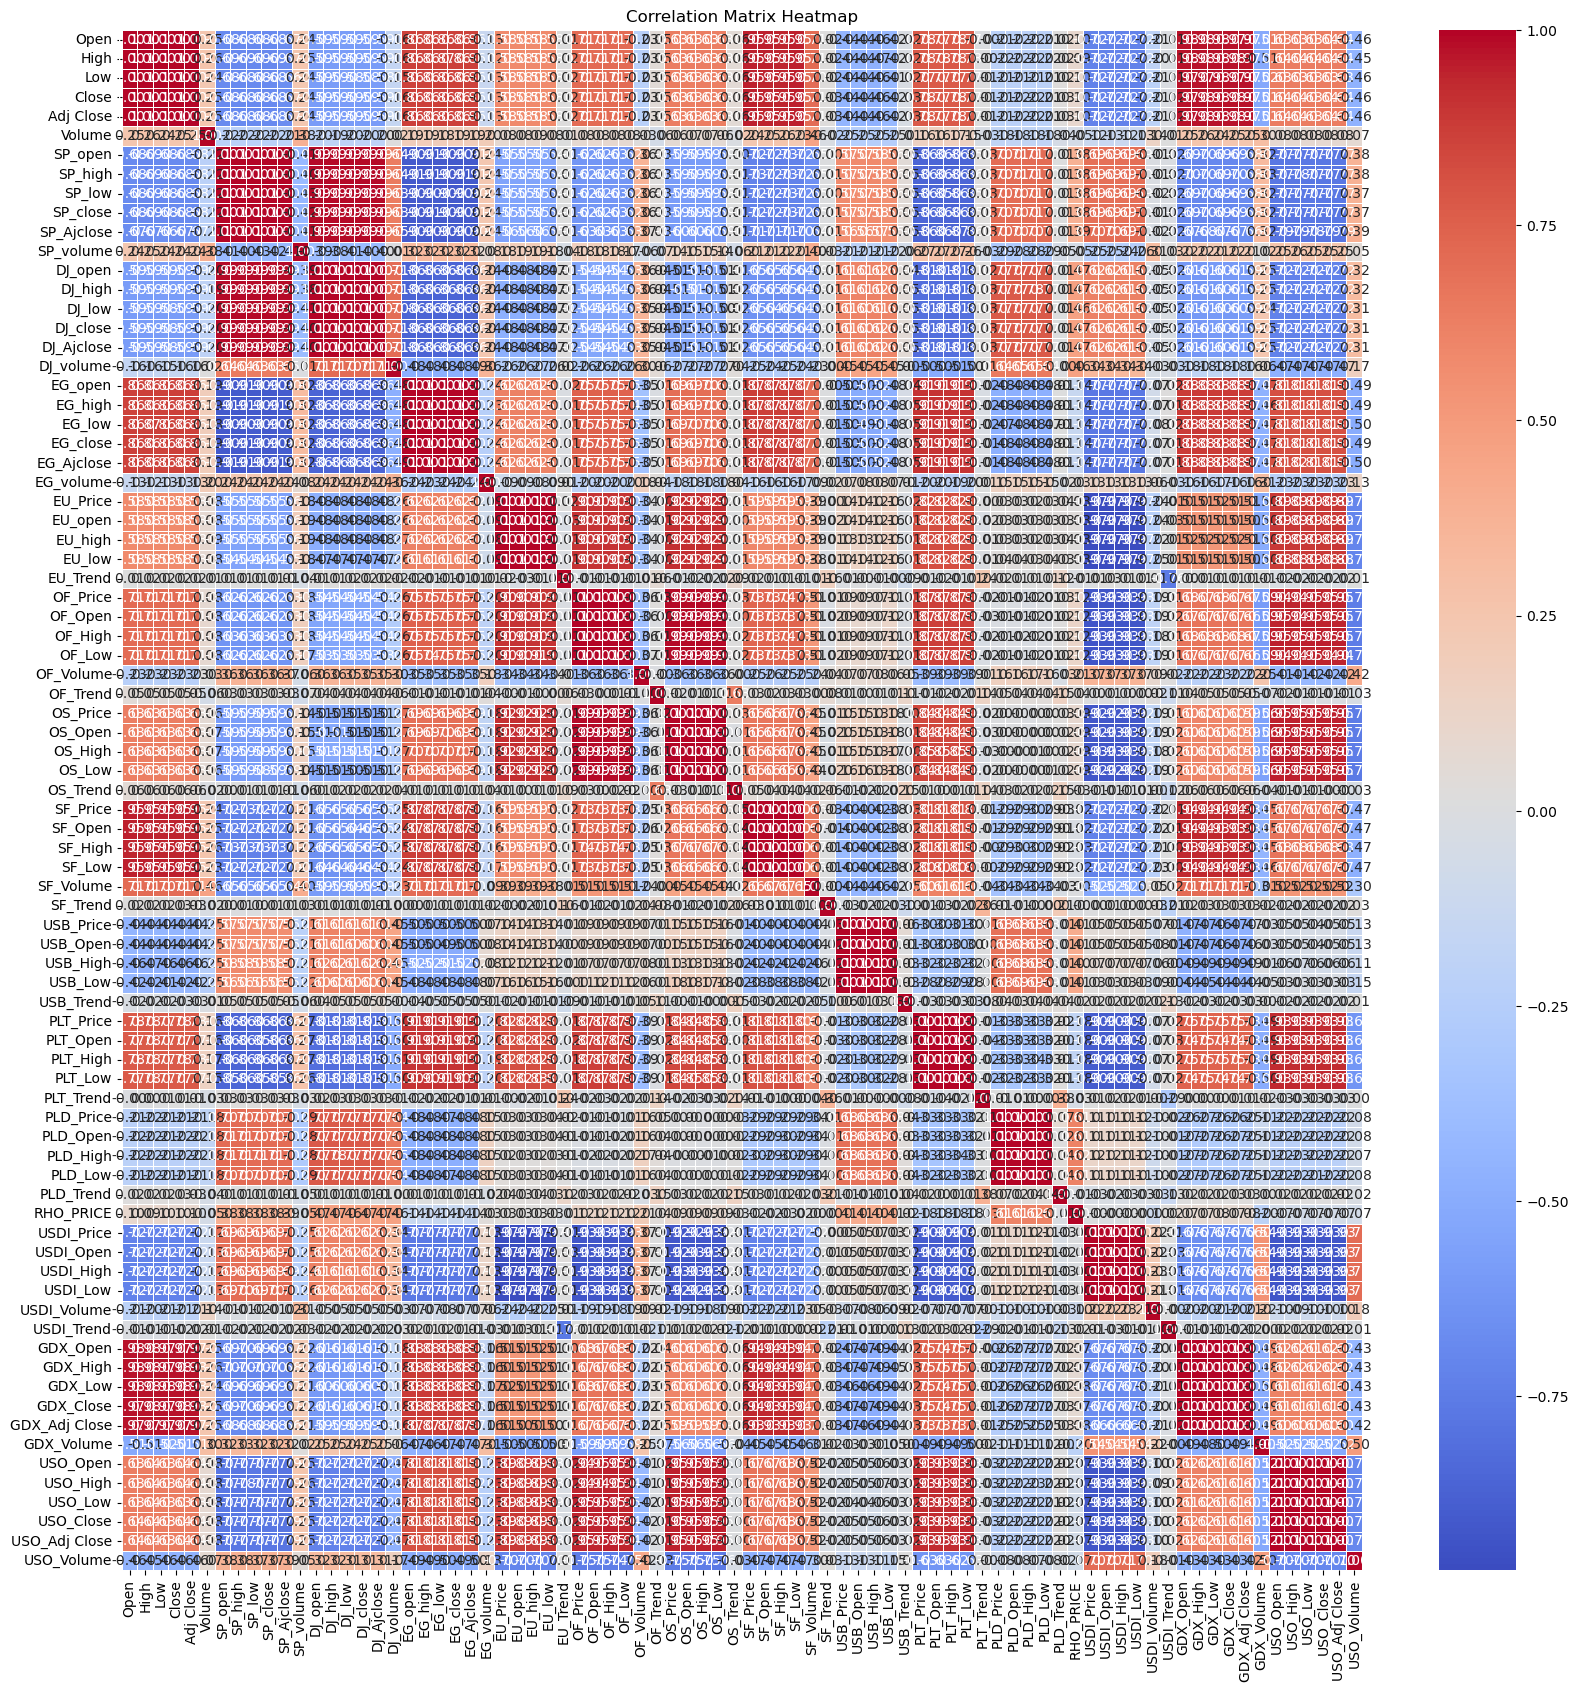

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(correleation, annot=True, cmap='coolwarm',linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

<AxesSubplot:>

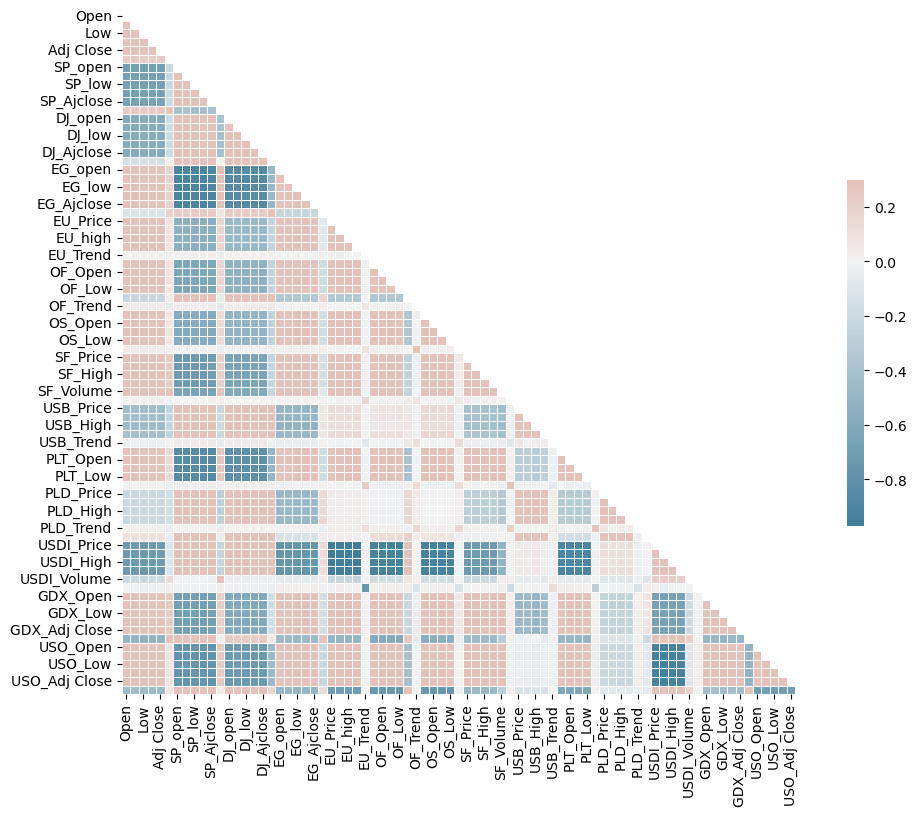

In [17]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correleation, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correleation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
X = data.drop(['Date','Adj Close'], axis = 1)
y = data['Adj Close']

In [19]:
print(X.shape)
y.shape

(1718, 79)


(1718,)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state =44)

In [21]:
print("X_TrainShape",X_train.shape)
print("X_TestShape",X_test.shape)
print("y_TrainShape",y_train.shape)
print("y_TestShape",y_test.shape)

X_TrainShape (1151, 79)
X_TestShape (567, 79)
y_TrainShape (1151,)
y_TestShape (567,)


In [22]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=50,max_depth = 20 ,n_jobs=-1)

RandomForestRegressorModel.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=50, n_jobs=-1)

In [23]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9999743991738491
Random Forest Regressor Test Score is :  0.9998073065417221


In [24]:
y_pred =  RandomForestRegressorModel.predict(X_test)
# print('Predicted Value for RandomForestRegressorModelis : ' , y_pred)
# print( ' y : ' , y[:10])

print(y_pred.shape)

(567,)


In [25]:
y_pred= pd.DataFrame(y_pred,columns=['Expected'])
y_pred

,Expected
0,105.052400
1,108.620000
2,162.004401
3,155.205799
4,152.686800
...,...
562,119.804601
563,121.789002
564,123.226799
565,117.115600


In [26]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print("MAEValue is :" ,MAEValue)

MAEValue is : 0.07836883626102067


In [27]:
MSEValue= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("MSEValue is : " , MSEValue)

MSEValue is :  [0.05834051]
